In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [61]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, confusion_matrix, classification_report

In [4]:
import tensorflow as tf 
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.losses import mae 
from tensorflow.keras.metrics import Mean 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [6]:
df = pd.read_csv('./data/creditcard.csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.shape

(284807, 31)

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
df.isna().sum().sum()

0

In [15]:

cat_feats = [x for x in df.columns if len(df[x].unique()) <=2]
num_feats = [x for x in df.columns if x not in cat_feats]

In [17]:
cat_feats

['Class']

In [19]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [20]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

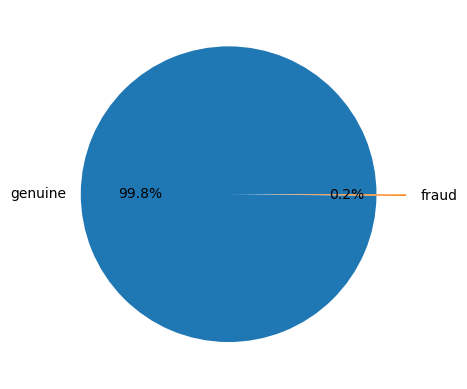

In [21]:
pie = df['Class'].value_counts(ascending=False)
plt.pie(x=pie.values, labels=['genuine', 'fraud'], explode=[0.0, 0.2], autopct='%1.1f%%')
plt.show()

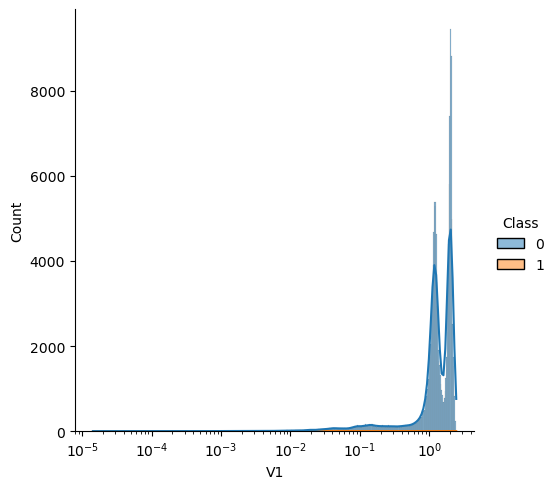

In [23]:
sns.displot(data=df, x='V1', hue='Class', log_scale=True, kde=True)
plt.show()

In [24]:
col_trans = make_column_transformer((StandardScaler(), num_feats))

df_scaled = pd.DataFrame(col_trans.fit_transform(df), columns=num_feats)
df_cat_feats = df[cat_feats]

df_concat = pd.concat([df_scaled, df_cat_feats], axis=1)

In [28]:
df_concat.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


In [29]:
X = df_concat.drop(['Class'], axis=1)
y = df_concat['Class']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [32]:
y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

In [35]:
x_train_genuine = x_train[~y_train]
x_test_genuine = x_test[~y_test]

In [39]:
x_train_fraud = x_train[y_train]
x_test_fraud = x_test[y_test]

## Auto Encoder Model

In [42]:
CODE_DIM = 2
INPUT_SHAPE = x_train.shape[1]

In [44]:
input_layer = Input(shape=(INPUT_SHAPE, ))
x = Dense(64, activation='relu')(input_layer)
x = Dense(16, activation='relu')(x)
code = Dense(CODE_DIM, activation='relu')(x)
x = Dense(16, activation='relu')(code)
x = Dense(64, activation='relu')(x)
output_layer = Dense(INPUT_SHAPE, activation='relu')(x)

In [45]:
autoencoder = Model(input_layer, output_layer, name='anomaly')

In [46]:
autoencoder

<Functional name=anomaly, built=True>

In [47]:
autoencoder.compile(loss='mae', optimizer=Adam())

In [48]:
history = autoencoder.fit(x_train_genuine, x_train_genuine, epochs=50, batch_size=32, validation_data=(x_test, x_test), shuffle=True)

Epoch 1/50
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.6097 - val_loss: 0.5934
Epoch 2/50
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.5882 - val_loss: 0.5880
Epoch 3/50
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.5839 - val_loss: 0.5847
Epoch 4/50
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.5818 - val_loss: 0.5833
Epoch 5/50
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.5793 - val_loss: 0.5828
Epoch 6/50
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.5786 - val_loss: 0.5799
Epoch 7/50
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.5757 - val_loss: 0.5772
Epoch 8/50
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.5738 - val_loss: 0.5762
Epoch 9/50
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.5738 - val_loss: 0.5757
Epoch 10/50
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.5724 - val_loss: 0.5756
Epoch 11/50
6219/6219 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.5718 - val_loss: 0.5750
Epoch 12/50
6219/6219 ━━━━━━━━

In [56]:
autoencoder.save('anomaly-model.h5')

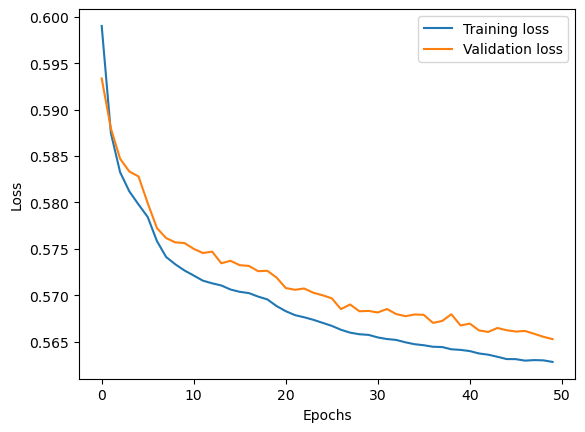

In [50]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

## Reconstruction

In [57]:
reconstructions = autoencoder.predict(x_test, verbose=0)
reconstructions_error = mae(reconstructions, x_test)

In [60]:
recons_df = pd.DataFrame({
    'error': reconstructions_error,
    'y_true': y_test
}).reset_index(drop=True)
recons_df.head()

,error,y_true
0,6.030435,True
1,0.782617,False
2,0.470828,False
3,0.460295,False
4,0.351227,False


In [62]:
def thresholdTuning(df, iterations):
    thresh_df = {
        'threshold': [],
        'accuracy': [],
        'precision': [],
        'recall': []
    }

    for i in range(iterations):
        thresh_value = df['error'].quantile(i/iterations)
        preds = df['error'] > thresh_value
        cr = classification_report(df['y_true'], preds, output_dict=True)
        acc = cr['accuracy']
        prec = cr['macro avg']['precision']
        rc = cr['macro avg']['recall']

        thresh_df['threshold'].append(thresh_value)
        thresh_df['accuracy'].append(acc)
        thresh_df['precision'].append(prec)
        thresh_df['recall'].append(rc)

        print(f"Threshold: {thresh_value:4f}\tAccuracy: {acc:4f}\t\tPrecision: {prec:4f}\tRecall: {rc:4f}")
    return pd.DataFrame(thresh_df)

In [63]:
thresh_df = thresholdTuning(recons_df, 10)

Threshold: 0.197488	Accuracy: 0.001603		Precision: 0.500796	Recall: 0.500006
Threshold: 0.333713	Accuracy: 0.101600		Precision: 0.500884	Recall: 0.550084
Threshold: 0.376395	Accuracy: 0.201596		Precision: 0.500995	Recall: 0.600162
Threshold: 0.417840	Accuracy: 0.301546		Precision: 0.501081	Recall: 0.642875
Threshold: 0.461445	Accuracy: 0.401496		Precision: 0.501229	Recall: 0.685588
Threshold: 0.505486	Accuracy: 0.501504		Precision: 0.501498	Recall: 0.735672
Threshold: 0.550253	Accuracy: 0.601500		Precision: 0.501892	Recall: 0.785750
Threshold: 0.601963	Accuracy: 0.701473		Precision: 0.502514	Recall: 0.832146
Threshold: 0.670863	Accuracy: 0.801423		Precision: 0.503723	Recall: 0.874859
Threshold: 0.803721	Accuracy: 0.901373		Precision: 0.507373	Recall: 0.917572


In [64]:
threshold = thresh_df[thresh_df['recall'] == thresh_df['recall'].max()]['threshold'].values[0]
print(f"Threshold with Maximum Recall: {threshold:6f}")

Threshold with Maximum Recall: 0.803721


In [65]:
thresh_df

,threshold,accuracy,precision,recall
0,0.197488,0.001603,0.500796,0.500006
1,0.333713,0.101600,0.500884,0.550084
2,0.376395,0.201596,0.500995,0.600162
3,0.417840,0.301546,0.501081,0.642875
4,0.461445,0.401496,0.501229,0.685588
5,0.505486,0.501504,0.501498,0.735672
6,0.550253,0.601500,0.501892,0.785750
7,0.601963,0.701473,0.502514,0.832146
8,0.670863,0.801423,0.503723,0.874859
9,0.803721,0.901373,0.507373,0.917572


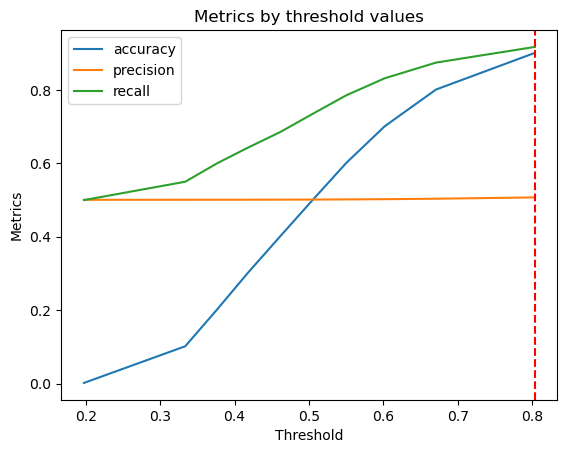

In [66]:
plt.plot(thresh_df['threshold'], thresh_df['accuracy'], label='accuracy')
plt.plot(thresh_df['threshold'], thresh_df['precision'], label='precision')
plt.plot(thresh_df['threshold'], thresh_df['recall'], label='recall')
plt.axvline(x=threshold, color='r', linestyle='dashed')
plt.xlabel('Threshold')
plt.ylabel('Metrics')
plt.title('Metrics by threshold values')
plt.legend()
plt.show()

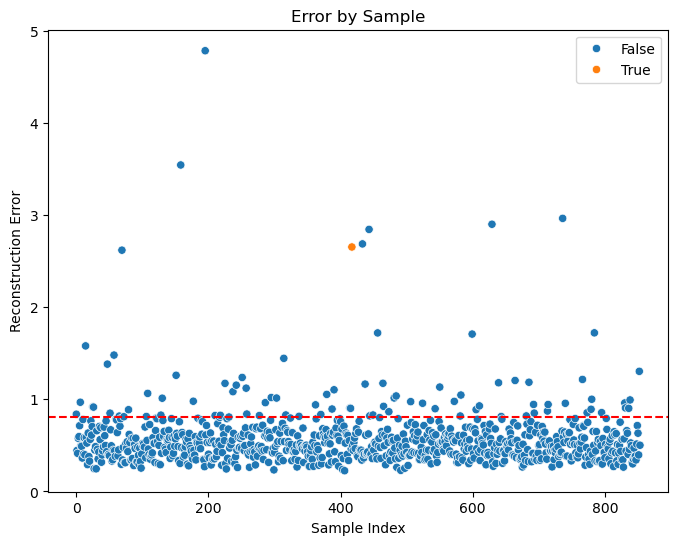

In [67]:
temp = recons_df.sample(frac=0.01, random_state=42).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.scatterplot(data=temp, x=temp.index, y='error', hue='y_true')
plt.axhline(y=threshold, color='r', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Error by Sample')
plt.legend()
plt.show()

In [68]:
recons_df['y_pred'] = recons_df['error'] > threshold
recons_df.head()

,error,y_true,y_pred
0,6.030435,True,True
1,0.782617,False,False
2,0.470828,False,False
3,0.460295,False,False
4,0.351227,False,False


In [69]:
print(classification_report(recons_df['y_true'], recons_df['y_pred']))

              precision    recall  f1-score   support

       False       1.00      0.90      0.95     85307
        True       0.01      0.93      0.03       136

    accuracy                           0.90     85443
   macro avg       0.51      0.92      0.49     85443
weighted avg       1.00      0.90      0.95     85443



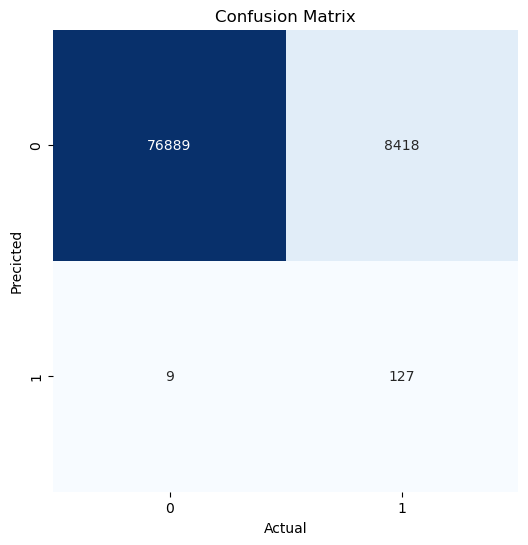

In [70]:
cm = confusion_matrix(recons_df['y_true'], recons_df['y_pred'])
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='.6g')
plt.xlabel('Actual')
plt.ylabel('Precicted')
plt.title('Confusion Matrix')
plt.show()

In [71]:
print(f"Recall score: {recall_score(recons_df['y_true'], recons_df['y_pred'])*100:.3f}")
print(f"Accuracy score: {accuracy_score(recons_df['y_true'], recons_df['y_pred'])*100:.3f}")

Recall score: 93.382
Accuracy score: 90.137
